In [1]:
from imports import *
from exactDiagMethods import *
from globalMethods import  *
from vqteMethods import *



In [2]:
def main():
    # Initialize the simulation parameters
    N = 1
    gamma_L= 0.5
    gamma_R = 1.0
    eps = 1
    mu_L= 0.25
    mu_R= 1
    T_L = 10   
    T_R= 1
    beta_L=1/T_L
    beta_R=1/T_R
    F_L = 1/(np.exp(beta_L*(eps-mu_L))+1)
    F_R = 1/(np.exp(beta_R*(eps-mu_R))+1)
    J = 1
    
    #Layer = 2

    eps_list = []

    for i in range(N):
        eps_list.append(1)

  
    time = 6.0
    dt = 0.05
    nt = int(time/dt)

    

    exact_diag_ham = build_exact_diag_hamiltonian(J, eps_list)

    #print("Exact Ham", exact_diag_ham)

    ham_real, ham_imag = hamiltonian_generation(N, eps_list, gamma_L, gamma_R, F_L, F_R, J)
    
    print("Ham Real: ", ham_real
          )
    print("Ham Imag: ", ham_imag)

    print("Exact Diag Ham: ", exact_diag_ham)
 
    
    
    print("VQTE Hamiltonian Matrix: ", (ham_imag.to_matrix()+ham_real.to_matrix()))
    # Generate initial states
    vqte_init_state, exact_diag_init_state, ansatz, init_param_values = build_initial_states(ham_real)



    exact_diag_results = perform_exact_diag(gamma_L,F_L, gamma_R, F_R, dt, nt, exact_diag_init_state,exact_diag_ham, N)
    print(len(exact_diag_results))
 
    vqte_results = perform_vqte(ham_real, ham_imag, vqte_init_state, dt, nt, ansatz, init_param_values)
    
    # # Output results
    output_results(vqte_results, exact_diag_results, time, nt)

Ham Real:  SparsePauliOp(['ZI', 'IZ', 'XY', 'YX'],
              coeffs=[ 0.5      +0.j, -0.5      +0.j, -0.0046853+0.j, -0.0046853+0.j])
Ham Imag:  SparsePauliOp(['XX', 'YY', 'II', 'ZI', 'IZ'],
              coeffs=[-0.375    +0.j,  0.375    +0.j,  0.75     +0.j, -0.0046853+0.j,
 -0.0046853+0.j])
Exact Diag Ham:  [[0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
VQTE Hamiltonian Matrix:  [[ 0.74062939+0.j          0.        +0.j          0.        +0.j
  -0.75      +0.00937061j]
 [ 0.        +0.j          1.75      +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j         -0.25      +0.j
   0.        +0.j        ]
 [-0.75      -0.00937061j  0.        +0.j          0.        +0.j
   0.75937061+0.j        ]]
1
Step 0 out of 120
Exp val at step 0 : (0.03572525077768741-2.5312683126759862e-17j)
2
Step 1 out of 120
Exp val at step 1 : (0.06895668915722716-4.717461752109267e-17j)
3
Step 2 out of 120
Exp val at step 2 : (0.09986104313139918-6.604922988543697e

c:\Users\tessa\Documents\GitHub\open-quantum-systems-simulation\.venv\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\tessa\Documents\GitHub\open-quantum-systems-simulation\.venv\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


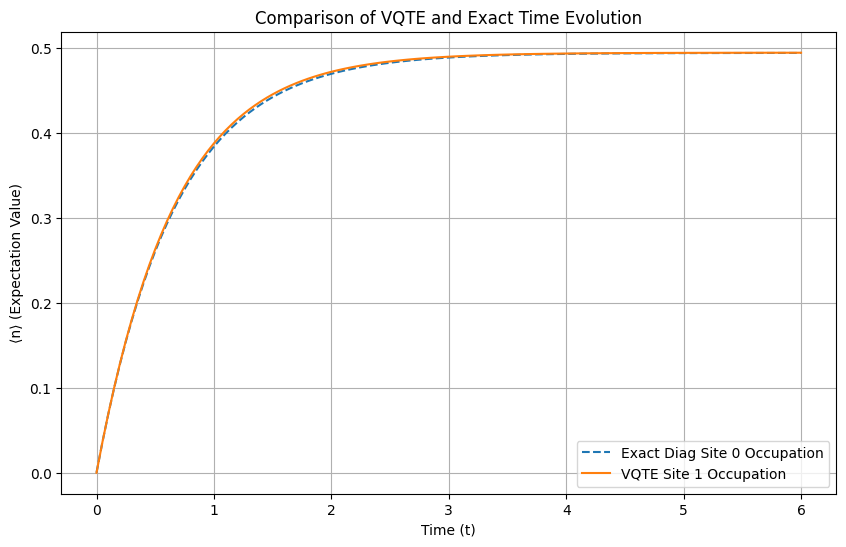

In [3]:
main()

